## CS 4981 Term Project: DOTA 2 Game Prediction

### Ben Halligan

### Introduction
In this notebook we will be exploring game data from The DOTA 2 International 9 tornament, played between August 20th - 20th 2019.
This data comes from the [<OPENDOTA/>](https://www.opendota.com/) projec, we will explore post game data to try to find trends of winning teams.

### Part 1 Loading Data

In this section we are loading in the csv and cleaning and changing datatypes to better work with it later.

In [4]:
# Dataframes and Arrays
import pandas as pd
import numpy as np
# Graphing
import seaborn as sns
import matplotlib.pyplot as plt
# Linear Regression Stuff
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

filename = 'data.csv'

df = pd.read_csv(filename)
df.head()

,xp_per_min,tower_damage,sen_placed,sen_destroyed,obs_placed,obs_destroyed,lh50,lh40,lh30,lh20,...,dmg_dealt,camps_stacked,buybacks,assists,match_id,start_time,win,hero_id,account_id,leaguename
0,720,8249,1,1,1,1,473,396,263,152,...,45333,2,2,18,4973234250,1566108686,False,42,100471531,The International 2019
1,624,505,1,3,1,5,309,227,174,107,...,30858,3,1,28,4969288250,1565927125,True,65,184950344,The International 2019
2,616,654,8,9,3,3,288,205,146,78,...,36108,2,2,17,4967600837,1565834467,True,9,155494381,The International 2019
3,603,8285,2,2,6,4,234,167,76,28,...,37496,1,3,11,4971157392,1566019029,False,52,139876032,The International 2019
4,602,976,11,6,7,3,253,144,93,63,...,31819,3,1,24,4969288250,1565927125,True,9,155494381,The International 2019


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 29 columns):
xp_per_min       88 non-null int64
tower_damage     88 non-null int64
sen_placed       88 non-null int64
sen_destroyed    88 non-null int64
obs_placed       88 non-null int64
obs_destroyed    88 non-null int64
lh50             88 non-null int64
lh40             88 non-null int64
lh30             88 non-null int64
lh20             88 non-null int64
lh10             88 non-null int64
last_hits        88 non-null int64
kills            88 non-null int64
hero_healing     88 non-null int64
hero_damage      88 non-null int64
gold_per_min     88 non-null int64
denies           88 non-null int64
deaths           88 non-null int64
dmg_received     88 non-null int64
dmg_dealt        88 non-null int64
camps_stacked    88 non-null int64
buybacks         88 non-null int64
assists          88 non-null int64
match_id         88 non-null int64
start_time       88 non-null int64
win              88 no

### Exploring Data
- Seeing distribution data points
- Looking for which features appear to correlate to winning games

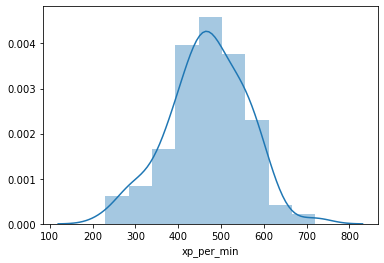

In [6]:
sns.distplot(df['xp_per_min'])

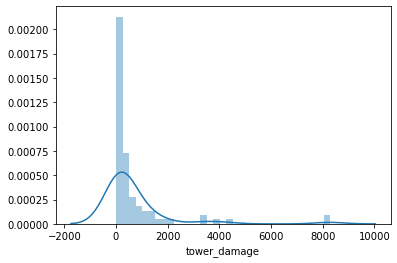

In [7]:
sns.distplot(df['tower_damage'])

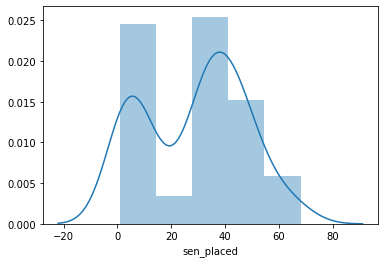

In [8]:
sns.distplot(df['sen_placed'])

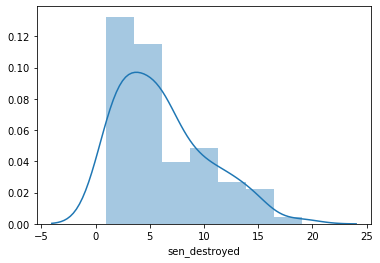

In [9]:
sns.distplot(df['sen_destroyed'])

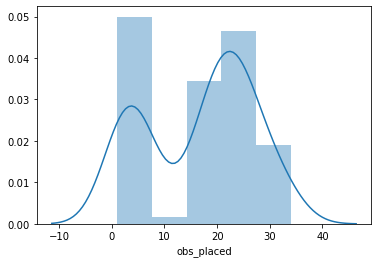

In [10]:
sns.distplot(df['obs_placed'])

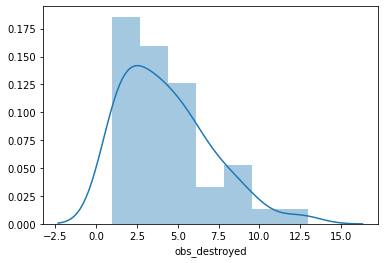

In [11]:
sns.distplot(df['obs_destroyed'])

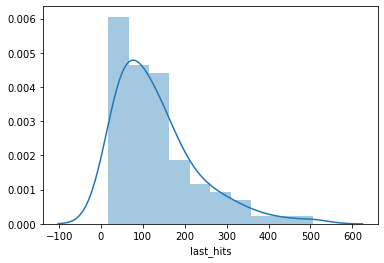

In [12]:
sns.distplot(df['last_hits'])

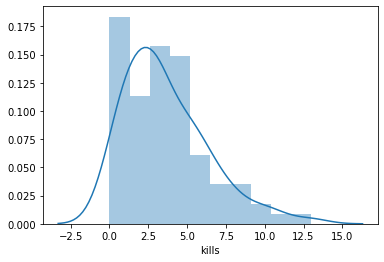

In [13]:
sns.distplot(df['kills'])

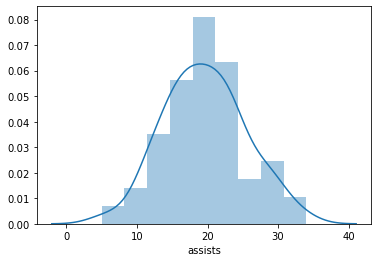

In [14]:
sns.distplot(df['assists'])

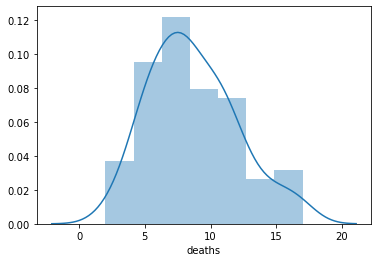

In [15]:
sns.distplot(df['deaths'])

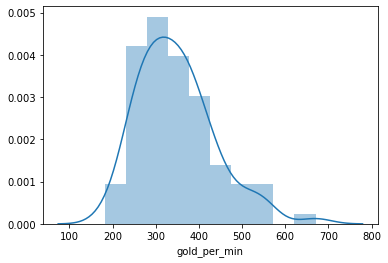

In [16]:
sns.distplot(df['gold_per_min'])

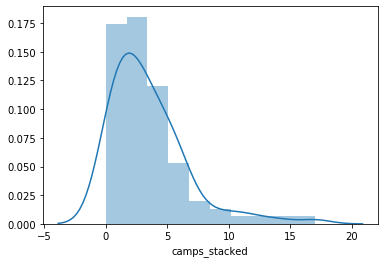

In [17]:
sns.distplot(df['camps_stacked'])

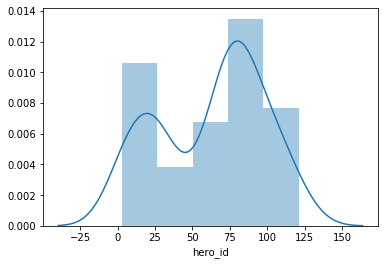

In [18]:
sns.distplot(df['hero_id'])

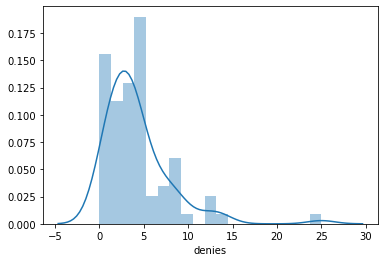

In [19]:
'''
dmg_dealt         int64
buybacks          int64
'''
sns.distplot(df['denies'])

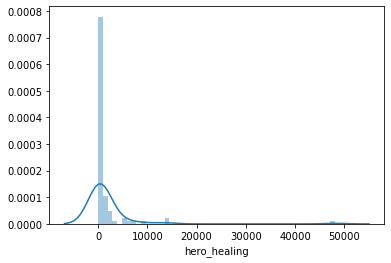

In [20]:
sns.distplot(df['hero_healing'])

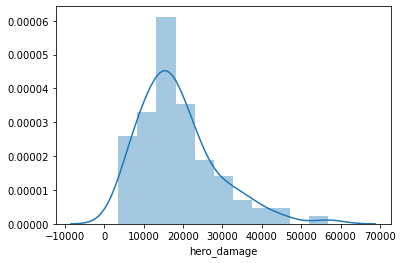

In [21]:
sns.distplot(df['hero_damage'])

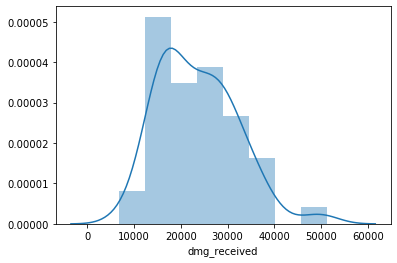

In [22]:
sns.distplot(df['dmg_received'])

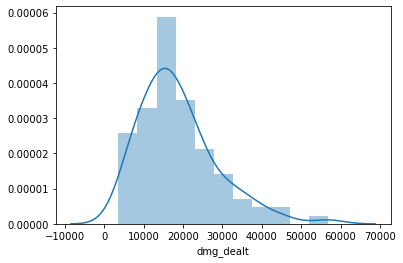

In [23]:
sns.distplot(df['dmg_dealt'])

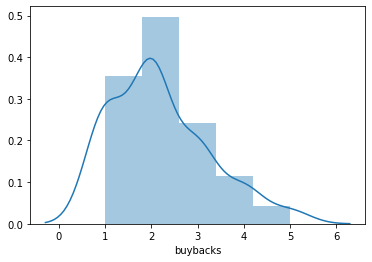

In [24]:
sns.distplot(df['buybacks'])

In [25]:
df.win = df.win.astype('int64')
df['win'] = df.win.astype('category')

## Exploring Features' relationships with Winning

Using mostly boxplots since the feature we want to predict is either 0 or 1 and categorical

In [26]:
df.dtypes

xp_per_min          int64
tower_damage        int64
sen_placed          int64
sen_destroyed       int64
obs_placed          int64
obs_destroyed       int64
lh50                int64
lh40                int64
lh30                int64
lh20                int64
lh10                int64
last_hits           int64
kills               int64
hero_healing        int64
hero_damage         int64
gold_per_min        int64
denies              int64
deaths              int64
dmg_received        int64
dmg_dealt           int64
camps_stacked       int64
buybacks            int64
assists             int64
match_id            int64
start_time          int64
win              category
hero_id             int64
account_id          int64
leaguename         object
dtype: object

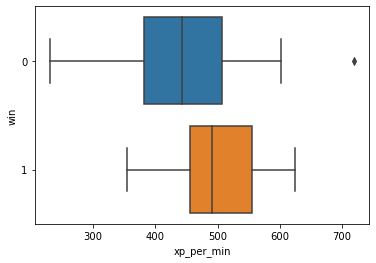

In [27]:
sns.boxplot('xp_per_min','win', data=df)

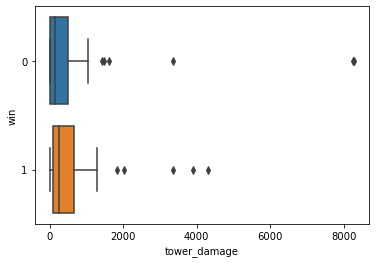

In [28]:
sns.boxplot('tower_damage','win', data=df)

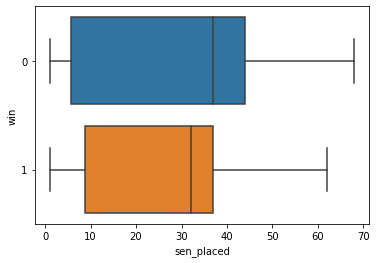

In [29]:
sns.boxplot('sen_placed','win', data=df)

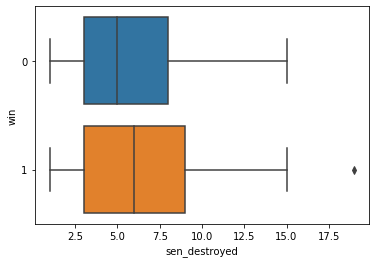

In [30]:
sns.boxplot('sen_destroyed','win', data=df)

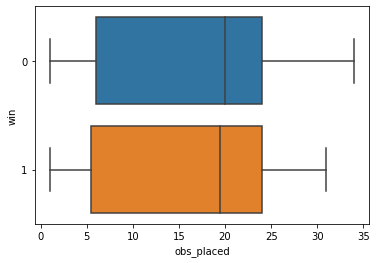

In [31]:
sns.boxplot('obs_placed','win', data=df)

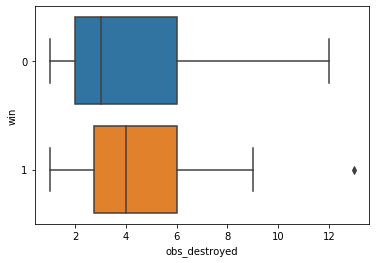

In [32]:
sns.boxplot('obs_destroyed','win', data=df)

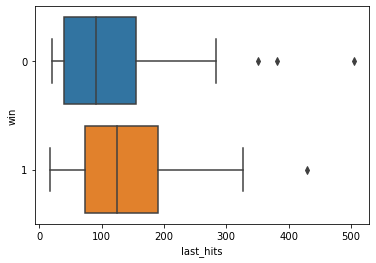

In [33]:
sns.boxplot('last_hits','win', data=df)

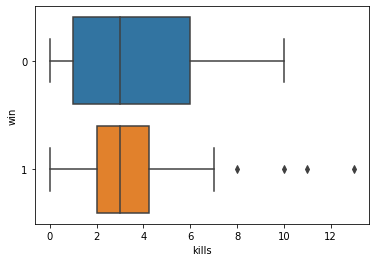

In [34]:
sns.boxplot('kills','win', data=df)

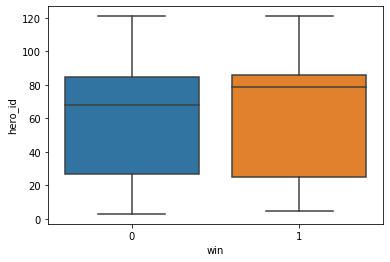

In [35]:
sns.boxplot( 'win','hero_id', data=df)
# this plot means nothing

### Experimental Setup

Switch `hero_id`, `match_id`, `account_id`, and `leaguename` as categorical and then create dummy columns for `hero_id` since all of these games where played at The International 9, and we don't want to predict based off the match id or player id. But, `hero_id` lets us observe which heros are part of the current meta, and have higher win rates.

In [43]:
df['match_id'] = df['match_id'].astype('category')
df['hero_id'] = df['hero_id'].astype('category')
df['account_id'] = df['account_id'].astype('category')
df['leaguename'] = df['leaguename'].astype('category')
df.dtypes

xp_per_min          int64
tower_damage        int64
sen_placed          int64
sen_destroyed       int64
obs_placed          int64
obs_destroyed       int64
lh50                int64
lh40                int64
lh30                int64
lh20                int64
lh10                int64
last_hits           int64
kills               int64
hero_healing        int64
hero_damage         int64
gold_per_min        int64
denies              int64
deaths              int64
dmg_received        int64
dmg_dealt           int64
camps_stacked       int64
buybacks            int64
assists             int64
match_id         category
start_time          int64
win              category
hero_id          category
account_id       category
leaguename       category
dtype: object

In [45]:
numerical_columns = ['xp_per_min', 'tower_damage', 'sen_placed', 'sen_destroyed', 'obs_placed', 'obs_destroyed',
'lh50', 'lh40', 'lh30', 'lh20', 'lh10', 'last_hits', 'kills', 'hero_healing', 'hero_damage','gold_per_min', 
'denies', 'deaths', 'dmg_received', 'dmg_dealt','camps_stacked', 'buybacks','assists']
categorical_columns = ['hero_id']
all_columns = numerical_columns + categorical_columns

dummy_columns = {}
for col_name in categorical_columns:
    dummies = pd.get_dummies(df[col_name], prefix=col_name)
    dummy_columns[col_name] = dummies.columns.values
    df = df.merge(dummies, left_index=True, right_index=True)

In [46]:
# now we have a whole bunch of features from hero id
df.head()

,xp_per_min,tower_damage,sen_placed,sen_destroyed,obs_placed,obs_destroyed,lh50,lh40,lh30,lh20,...,hero_id_84,hero_id_86,hero_id_97,hero_id_101,hero_id_103,hero_id_107,hero_id_110,hero_id_111,hero_id_119,hero_id_121
0,720,8249,1,1,1,1,473,396,263,152,...,0,0,0,0,0,0,0,0,0,0
1,624,505,1,3,1,5,309,227,174,107,...,0,0,0,0,0,0,0,0,0,0
2,616,654,8,9,3,3,288,205,146,78,...,0,0,0,0,0,0,0,0,0,0
3,603,8285,2,2,6,4,234,167,76,28,...,0,0,0,0,0,0,0,0,0,0
4,602,976,11,6,7,3,253,144,93,63,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_train, df_test = train_test_split(df)
print(df.shape, df_train.shape, df_test.shape)

(88, 64) (66, 64) (22, 64)


In [52]:
y_train = df_train['win'].values
y_test = df_test['win'].values

### Simple Logistical Regression

First we are creating a null and simple Logistic Regresson model. From these two models we are going to create a confusion matrix and calculate accuracy.

In [54]:
from sklearn.linear_model import SGDClassifier

# Zeros
zeros_train = np.zeros(df_train.shape)
zeros_test = np.zeros(df_test.shape)

null_lr = SGDClassifier(max_iter=10000, loss='log')
null_lr.fit(zeros_train, y_train)
pred_null_labels = null_lr.predict(zeros_test)
pred_prob = null_lr.predict_proba(zeros_test)

null_accuracy = accuracy_score(y_test, pred_null_labels)
null_loss = log_loss(y_test, pred_prob)
cm = confusion_matrix(y_test, pred_null_labels)

print("Accuracy:", null_accuracy)
print("Loss:", null_loss)
print("Confusion matrix:")
print(cm)

Accuracy: 0.3181818181818182
Loss: 1.7597703933821507
Confusion matrix:
[[ 0 15]
 [ 0  7]]


### Feature Selection with Greedy Algorithm

Decided to skip selecting freatures myself since I am biased by watch The International when it was streamed, and this notebook is more about exploring overlooked stats for correclation with winning.

In [58]:
candidate_columns = numerical_columns + categorical_columns

In [56]:
def create_feature_matrices(df_train, df_test, selected_columns, dummy_columns):
    """
    Creates feature matrices for the training and testing sets from the given dataframes.
    The feature matrices are built from the columns given in selected columns.
    """
    
    # keep track of numerical features
    numerical_trial_columns = []
    
    # keep track of dummy features for categorical variables
    categorical_trial_columns = []
    
    # build feature lists
    for col_name in selected_columns:
        if col_name in dummy_columns:
            categorical_trial_columns.extend(dummy_columns[col_name])
        else:
            numerical_trial_columns.append(col_name)

    # transform numerical features
    if len(numerical_trial_columns) > 0:
        X_train_numerical = df_train[numerical_trial_columns].astype("float64").values
        X_test_numerical = df_test[numerical_trial_columns].astype("float64").values
    
        scaler = StandardScaler()
        X_train_numerical = scaler.fit_transform(X_train_numerical)
        X_test_numerical = scaler.transform(X_test_numerical)
    
    # select categorical features
    if len(categorical_trial_columns) > 0:
        X_train_categorical = df_train[categorical_trial_columns].astype("float64").values
        X_test_categorical = df_test[categorical_trial_columns].astype("float64").values
    
    # concatenate feature matrices
    if len(numerical_trial_columns) > 0 and len(categorical_trial_columns) > 0:
        X_train = np.hstack([X_train_numerical, X_train_categorical])
        X_test = np.hstack([X_test_numerical, X_test_categorical])
    elif len(numerical_trial_columns) > 0:
        X_train = X_train_numerical
        X_test = X_test_numerical
    else:
        X_train = X_train_categorical
        X_test = X_test_categorical
        
    return X_train, X_test


In [59]:
# Sort features by Accuracy and Loss

# Baseline
print("Null Model Accuracy:", null_accuracy)

column_accuracies = []

for col_name in candidate_columns:
    X_train, X_test = create_feature_matrices(df_train,
                                             df_test,
                                             [col_name],
                                             dummy_columns)
    
    simple_lr = SGDClassifier(max_iter=10000, loss="log")
    simple_lr.fit(X_train, y_train)
    pred_labels = simple_lr.predict(X_test)
    pred_probs = simple_lr.predict_proba(X_test)
    simple_accuracy = accuracy_score(y_test, pred_labels)
    simple_loss = log_loss(y_test, pred_probs)
    print()
    print(col_name + " Accuracy:", simple_accuracy)
    print(col_name + " Loss:", simple_loss)
    column_accuracies.append((simple_accuracy, col_name))
    
column_accuracies.sort(key=lambda p: p[0], reverse=True)
sorted_columns = [col_name for _, col_name in column_accuracies]
print()
print("Sorted columns:" + str(sorted_columns))

Null Model Accuracy: 0.3181818181818182

xp_per_min Accuracy: 0.45454545454545453
xp_per_min Loss: 1.631195146553573

tower_damage Accuracy: 0.6818181818181818
tower_damage Loss: 0.9118772778865896

sen_placed Accuracy: 0.5
sen_placed Loss: 1.8092445286562162

sen_destroyed Accuracy: 0.45454545454545453
sen_destroyed Loss: 1.1385725088435483

obs_placed Accuracy: 0.6818181818181818
obs_placed Loss: 2.463215728282258

obs_destroyed Accuracy: 0.36363636363636365
obs_destroyed Loss: 1.4609834418496377

lh50 Accuracy: 0.6363636363636364
lh50 Loss: 1.0234107046015088

lh40 Accuracy: 0.6818181818181818
lh40 Loss: 1.3580623345487473

lh30 Accuracy: 0.6818181818181818
lh30 Loss: 6.177405295897909

lh20 Accuracy: 0.6818181818181818
lh20 Loss: 1.2258224739864483

lh10 Accuracy: 0.6818181818181818
lh10 Loss: 5.85389446648798

last_hits Accuracy: 0.3181818181818182
last_hits Loss: 2.987087167373726

kills Accuracy: 0.3181818181818182
kills Loss: 3.6072167729477953

hero_healing Accuracy: 0.3181818

In [60]:
# Select Columns from the sorted columns
base_model_columns = []
base_loss = null_loss
base_accuracy = null_accuracy

print("Base Model Accuracy:", base_accuracy)
print("Base Model Loss:", base_loss)
print()

for col_name in sorted_columns:
    # track all column names
    trial_columns = base_model_columns[:]
    trial_columns.append(col_name)

    X_train, X_test = create_feature_matrices(df_train,
                                             df_test,
                                             trial_columns,
                                             dummy_columns)
    
    trial_lr = SGDClassifier(max_iter=50000, loss="log", penalty="l2")
    trial_lr.fit(X_train, y_train)
    pred_labels = trial_lr.predict(X_test)
    pred_prob = trial_lr.predict_proba(X_test)
    trial_accuracy = accuracy_score(y_test, pred_labels)
    trial_loss = log_loss(y_test, pred_prob)
    print()
    print(str(trial_columns) + " Model Accuracy:", trial_accuracy)
    print(str(trial_columns) + " Model Loss:", trial_loss)

    if trial_accuracy > base_accuracy:
        print("Updating base model")
        base_loss = trial_loss
        base_model_columns = trial_columns
        base_accuracy = trial_accuracy
    print()
    print("Base Model Loss:", base_loss)
    print("Base Model Accuracy:", base_accuracy)
    print()
    
print("Our chosen columns are: " + str(base_model_columns))

Base Model Accuracy: 0.3181818181818182
Base Model Loss: 1.7597703933821507


['gold_per_min'] Model Accuracy: 0.6363636363636364
['gold_per_min'] Model Loss: 2.565258349482436
Updating base model

Base Model Loss: 2.565258349482436
Base Model Accuracy: 0.6363636363636364


['gold_per_min', 'tower_damage'] Model Accuracy: 0.3181818181818182
['gold_per_min', 'tower_damage'] Model Loss: 2.996745785265098

Base Model Loss: 2.565258349482436
Base Model Accuracy: 0.6363636363636364


['gold_per_min', 'obs_placed'] Model Accuracy: 0.5909090909090909
['gold_per_min', 'obs_placed'] Model Loss: 2.015881438447698

Base Model Loss: 2.565258349482436
Base Model Accuracy: 0.6363636363636364


['gold_per_min', 'lh40'] Model Accuracy: 0.4090909090909091
['gold_per_min', 'lh40'] Model Loss: 1.888563176476849

Base Model Loss: 2.565258349482436
Base Model Accuracy: 0.6363636363636364


['gold_per_min', 'lh30'] Model Accuracy: 0.5
['gold_per_min', 'lh30'] Model Loss: 3.4864360930305565

Base Model Loss:

In [61]:
# Train based off selected columns
X_train, X_test = create_feature_matrices(df_train,
                                          df_test,
                                          base_model_columns,
                                          dummy_columns)
    
lr = SGDClassifier(max_iter=10000, loss="log")
lr.fit(X_train, y_train)
pred_labels = lr.predict(X_test)
trial_accuracy = accuracy_score(y_test, pred_labels)
cm = confusion_matrix(y_test, pred_labels)
print()
print("Model Accuracy:", trial_accuracy)
print("Confusion matrix:")
print(cm)


Model Accuracy: 0.4090909090909091
Confusion matrix:
[[ 3 12]
 [ 1  6]]


Text(0, 0.5, 'True Positive Rate')

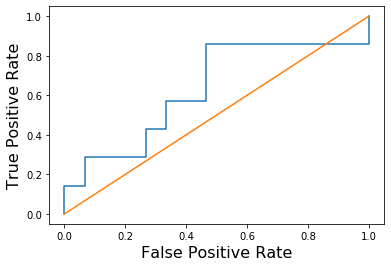

In [62]:
# analysis the results
from sklearn.metrics import roc_curve

pred_proba = lr.predict_proba(X_test)

# turn multiclass problem into binary problem
pred_proba_1 = 1.0 - pred_proba[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_proba_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)



### Analyzing the Results of Greedy Algorithm's selected Columns

From the Graph of True Positive Rate vs False Positive Rate we have some pretty bad results for the first half of the testing data. This can be explained in a number of ways

- The Data is split so that the Model was trained on less experinced teams of the lower bracket meaning that once a team got ahead, they stayed ahead
- The Model is not taking in account teams that have made comebacks from losing situations, or playing in a manner that does not create data of the features selected like map location or ward location, Roshan times, etc.
- The Pro Team OG offen used the promotional Compendem Battle Pass' point system to tip the opposing team for anything that helped them, as well as constatly poking fun at their oppents with their draft style.

Regardless of what the cause behind poor model preformance, we will have to re-create the model using personal domain knowledge of Dota 2. The features selected will be based on events in the game that are not expressed in the model such as:

- `tower_damage` - Higher tower damage means that more objectives have been taken, thus one team is not Defending their Ancient
- `last_hits` - More last hits typically means more waves have been cleared making objectives easier to push
- `gold_per_minute` - This one is tied to last hits, since that is primary way to generate gold, additionally more gold leads to better items, which gives an advantage in fighting and pushing
- `kills`, `assists`, `deaths` - If you have many of the first two, you should have less of the last one, and if the enemy team is dead they cannot push back
- `xp_per_minute` - This is around about measure of hero levels, higher level heros are better and higher xp per minute means that you have higher level heros earlier in the game
- `obs_destroyed` and `sen_destroyed` - These are selected from the data exploration, we can intuit that winning teams are less likely to need to look for the opposing teams movements, since they are pushing into there base

We will be skipping the create_feature_matrix part since all of the features we selected are numerical

In [68]:
df.columns

Index(['xp_per_min', 'tower_damage', 'sen_placed', 'sen_destroyed',
       'obs_placed', 'obs_destroyed', 'lh50', 'lh40', 'lh30', 'lh20', 'lh10',
       'last_hits', 'kills', 'hero_healing', 'hero_damage', 'gold_per_min',
       'denies', 'deaths', 'dmg_received', 'dmg_dealt', 'camps_stacked',
       'buybacks', 'assists', 'match_id', 'start_time', 'win', 'hero_id',
       'account_id', 'leaguename', 'hero_id_3', 'hero_id_5', 'hero_id_7',
       'hero_id_9', 'hero_id_16', 'hero_id_19', 'hero_id_20', 'hero_id_21',
       'hero_id_23', 'hero_id_25', 'hero_id_26', 'hero_id_27', 'hero_id_30',
       'hero_id_31', 'hero_id_32', 'hero_id_37', 'hero_id_42', 'hero_id_52',
       'hero_id_62', 'hero_id_64', 'hero_id_65', 'hero_id_66', 'hero_id_68',
       'hero_id_75', 'hero_id_79', 'hero_id_84', 'hero_id_86', 'hero_id_97',
       'hero_id_101', 'hero_id_103', 'hero_id_107', 'hero_id_110',
       'hero_id_111', 'hero_id_119', 'hero_id_121'],
      dtype='object')

In [79]:
picked_train = df_train[['xp_per_min', 'tower_damage', 'sen_destroyed',
       'obs_destroyed', 'last_hits', 'kills', 'gold_per_min','deaths', 'assists']]
picked_test = df_test[['xp_per_min', 'tower_damage', 'sen_destroyed',
       'obs_destroyed', 'last_hits', 'kills', 'gold_per_min','deaths', 'assists']]

scaler = StandardScaler()
scaled_train = scaler.fit_transform(picked_train)
scaled_test = scaler.transform(picked_test)

picked_lr = SGDClassifier(max_iter=10000, loss='log')
picked_lr.fit(scaled_train, y_train)
pick_labels = picked_lr.predict(scaled_test)
pick_prob = picked_lr.predict_proba(scaled_test)



pick_null_accuracy = accuracy_score(y_test, pick_labels)
pick_loss = log_loss(y_test, pick_prob)
pick_cm = confusion_matrix(y_test, pick_labels)

print('Accuracy: ',pick_null_accuracy)
print('Loss: ', pick_loss)
print('Confusion Matrix:')
print(cm)

Accuracy:  0.5454545454545454
Loss:  9.418891859265456
Confusion Matrix:
[[ 3 12]
 [ 1  6]]


Text(0, 0.5, 'True Positive Rate')

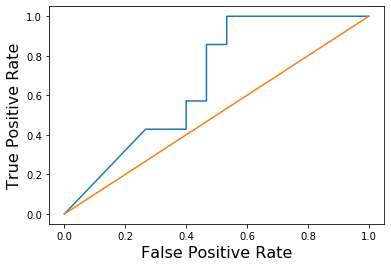

In [80]:
# analysis the results

# turn multiclass problem into binary problem
pick_prob = 1.0 - pick_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pick_prob)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)


### Results and Conculsion

When comparing the feature selected Greedy Algorithm and Our Domain Knowledge based model, there are better results from the hand picked features. This result is better because the graph of False Positive Rate vs True Posiitve Rate is above the line middle line meaning that there are more True Positive results than False Negative.

Reasons why this isn't better 

There could be factors that aren't expressed in the data that lead to winning, thses could be:
- Better players, meaning that a player is able to exploit a winning team to turn it around with lower stats
- Hail Mary Plays, meaning breaking the Tier 3s and 1 Tier 4 to base race to victory, ending the game with lower stats for tower damage and xp per minute
- Winning teams choking, and making mistakes that cause them to lose with an unfavoriable position

Our static end of game statistics do not show how the game changed over time, what items each hero had, and how the teams fights broke down. In order to create data we would either need a system like Valve's Dota Plus client which actively pulls active game data to predict which items should be bought, and where to push. Or a deeper scrape of DotaBuff.com to get hero positions during the game and timings of actions.
 
### Further Questions

Based on these general stats we can predict the likelihood of a team winning by only about 54%. If we were able to gather additional data about items, positions, and whose alive vs dead for likelihood of pushes we could actively predict a game from say the 10 minute mark onwards. Additionaly, OG was creditited for their the first consecutive back to back, with the same roster TI win ever by meming. 